In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

import gym
env = gym.make('CarRacing-v0')

import numpy as np
import itertools as it

from agent import DQNAgent

import torch
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
agent = DQNAgent(env)

---------- Initializing -----------
Action Map ->  12
---------- Model ---------
DQN(
  (conv1): Conv2d(3, 8, kernel_size=(4, 4), stride=(2, 2))
  (bn1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
  (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=29584, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=12, bias=True)
)


In [ ]:
scores = []
frames_in_episodes = []
for i in range(1000):
    score, frames = agent.play_episode()
    scores.append(score)
    frames_in_episodes.append(frames)
    print(i, score, frames)
    if i % 500 == 0:
        torch.save(agent.training_model.state_dict(), 'checkpoint.pth')

Track generation: 1075..1348 -> 273-tiles track
0 13.317647058823447 36
Track generation: 1076..1349 -> 273-tiles track
1 -6.341176470588236 28
Track generation: 1200..1504 -> 304-tiles track
2 8.203960396039506 38
Track generation: 1211..1518 -> 307-tiles track
3 3.0797385620914355 32
Track generation: 1167..1462 -> 295-tiles track
4 15.919047619047525 39
Track generation: 1116..1399 -> 283-tiles track
5 -3.5773049645390635 28
Track generation: 1163..1458 -> 295-tiles track
6 3.21360544217681 36
Track generation: 996..1249 -> 253-tiles track
7 16.819047619047524 36
Track generation: 1120..1404 -> 284-tiles track
8 -0.731448763250949 30
Track generation: 1251..1568 -> 317-tiles track
9 -4.2835443037975125 32
Track generation: 1166..1462 -> 296-tiles track
10 -2.481355932203442 32
Track generation: 1183..1488 -> 305-tiles track
11 2.6947368421051863 34
Track generation: 1223..1536 -> 313-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation

In [ ]:
for _ in range(20):
    env.render()
    obs, r, d, _ = env.step(env.action_space.sample())
    
plt.imshow(obs)

In [5]:
obs = env.reset()

Track generation: 1109..1390 -> 281-tiles track


In [6]:
env.close()

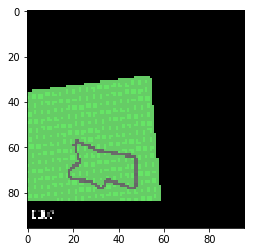

In [12]:
plt.imshow(obs)

In [13]:
ob2 = np.swapaxes(obs, 0, 2)

In [14]:
ob2.shape

(3, 96, 96)

In [ ]:
obs.shape

In [15]:
o = np.reshape(obs, (3,96,96))

In [17]:
o == ob2

array([[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ..., False, False, False],
        [False, False, False, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  Tr

In [6]:
from torchvision import transforms    

o = transforms.ToPILImage()(obs)

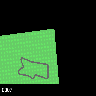

In [10]:
o

In [ ]:
torch.device('cpu')

In [ ]:
agent.training_model.load_state_dict(torch.load('checkpoint.pth', map_location='cpu'))

for i in range(3):
    state = env.reset()
    for j in range(200):
        action_idx = agent.get_action(state)
        print(action_idx)
        env.render()
        state, reward, done, _ = env.step(agent.action_map[action_idx])
        if done:
            break 
            
env.close()

In [ ]:
state = env.reset()
state = process_image(state)
for _ in range(1000):
    print('-------------------------------------')
    env.render()
    action_idx = get_random_action()
    action = all_actions[action_idx]
    print('Action -> ', action)
    next_state, reward, done, info = env.step(env.action_space.sample())
    print('Reward ->', reward)
    print('Done ->', done)
    next_state = process_image(next_state)
    print(next_state.shape)
    memory.add(state, action_idx, reward, next_state, done)
    state = next_state    
    print('-------------------------------------')


In [ ]:
4e-4

In [ ]:
env.close()